<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). Translated by [Sergey Oreshkov](https://www.linkedin.com/in/sergeoreshkov/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #8 (demo)

## <center> Implementation of online regressor
    
**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a8-demo-implementing-online-regressor) + [solution](https://www.kaggle.com/kashnitsky/a8-demo-implementing-online-regressor-solution).**

Here we'll implement a regressor trained with stochastic gradient descent (SGD). Fill in the missing code. If you do evething right, you'll pass a simple embedded test.

## <center>Linear regression and Stochastic Gradient Descent

In [225]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
from sklearn import metrics


Implement class `SGDRegressor`. Specification:
- class is inherited from `sklearn.base.BaseEstimator`
- constructor takes parameters `eta` – gradient step ($10^{-3}$ by default) and `n_epochs` – dataset pass count (3 by default)
- constructor also creates `mse_` and `weights_` lists in order to track mean squared error and weight vector during gradient descent iterations
- Class has `fit` and `predict` methods
- The `fit` method takes matrix `X` and vector `y` (`numpy.array` objects) as parameters, appends column of ones to  `X` on the left side, initializes weight vector `w` with **zeros** and then makes `n_epochs` iterations of weight updates (you may refer to this [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-8-vowpal-wabbit-fast-learning-with-gigabytes-of-data-60f750086237) for details), and for every iteration logs mean squared error and weight vector `w` in corresponding lists we created in the constructor. 
- Additionally the `fit` method will create `w_` variable to store weights which produce minimal mean squared error
- The `fit` method returns current instance of the `SGDRegressor` class, i.e. `self`
- The `predict` method takes `X` matrix, adds column of ones to the left side and returns prediction vector, using weight vector `w_`, created by the `fit` method.

NO CREAR EL SGDRegressor de 0. USAR EL DE LA LIBRERÍA DE Sci-Kit Learn

In [226]:
import pandas as pd
class SGDRegressor(BaseEstimator):
    # you code here
    def __init__(self):
        pass
        
    def fit(self, X, y):
        pass
                  
    def predict(self, X):
        pass                

Let's test out the algorithm on height/weight data. We will predict heights (in inches) based on weights (in lbs).

In [13]:
 data_demo = pd.read_csv('data/weights_heights.csv')

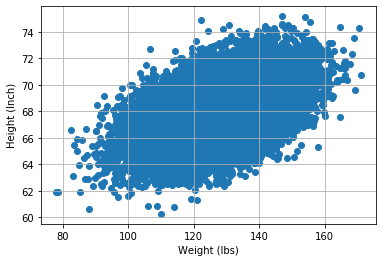

In [15]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

In [16]:
X, y = data_demo['Weight'].values, data_demo['Height'].values

Perform train/test split and scale data.

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

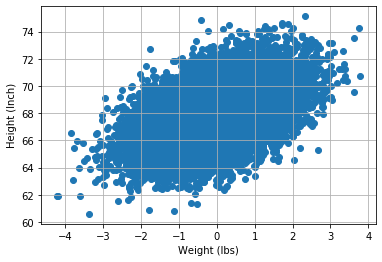

In [21]:
plt.scatter(X_train_scaled, y_train);
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

Draw a chart with training process  – dependency of mean squared error from the i-th SGD iteration number.

Es decir, como reduce el mean squared error por cada iteración

Print the minimal value of mean squared error and the best weights vector.

In [159]:
lr = SGDRegressor(verbose=1, random_state=42)
lr.fit(X_train_scaled, y_train)
lr.score(X_valid_scaled, y_valid)

-- Epoch 1
Norm: 0.96, NNZs: 1, Bias: 68.012080, T: 17500, Avg. loss: 21.410268
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.97, NNZs: 1, Bias: 67.985041, T: 35000, Avg. loss: 1.358429
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.93, NNZs: 1, Bias: 67.988174, T: 52500, Avg. loss: 1.358785
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.97, NNZs: 1, Bias: 68.002463, T: 70000, Avg. loss: 1.358627
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.92, NNZs: 1, Bias: 67.988299, T: 87500, Avg. loss: 1.358619
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.97, NNZs: 1, Bias: 68.001216, T: 105000, Avg. loss: 1.358527
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.94, NNZs: 1, Bias: 68.012676, T: 122500, Avg. loss: 1.358514
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.05 seconds


0.26466287416521683

In [158]:
lr2 = SGDRegressor(random_state=42)

In [87]:
for i in range(10):
    lr2.partial_fit(X_train_scaled, y_train)
    print("Score:",lr2.score(X_valid_scaled, y_valid))
    print("Weights: ",lr2.coef_ )

-- Epoch 1
Norm: 0.96, NNZs: 1, Bias: 68.012080, T: 17500, Avg. loss: 21.410268
Total training time: 0.00 seconds.
Score: 0.26482214594811937
Weights:  [0.96417368]
-- Epoch 1
Norm: 0.96, NNZs: 1, Bias: 68.011734, T: 17500, Avg. loss: 1.359076
Total training time: 0.01 seconds.
Score: 0.26482368707813786
Weights:  [0.95942738]
-- Epoch 1
Norm: 0.96, NNZs: 1, Bias: 68.011306, T: 17500, Avg. loss: 1.358902
Total training time: 0.01 seconds.
Score: 0.2648228416179176
Weights:  [0.9569824]
-- Epoch 1
Norm: 0.96, NNZs: 1, Bias: 68.010913, T: 17500, Avg. loss: 1.358801
Total training time: 0.01 seconds.
Score: 0.2648219765192078
Weights:  [0.95539978]
-- Epoch 1
Norm: 0.95, NNZs: 1, Bias: 68.010560, T: 17500, Avg. loss: 1.358732
Total training time: 0.01 seconds.
Score: 0.2648213206656497
Weights:  [0.95426057]
-- Epoch 1
Norm: 0.95, NNZs: 1, Bias: 68.010244, T: 17500, Avg. loss: 1.358679
Total training time: 0.01 seconds.
Score: 0.26482086671698457
Weights:  [0.95338761]
-- Epoch 1
Norm: 0.

In [ ]:
epochs = 50000
lr3 = SGDRegressor(random_state=42)

result = np.array([[i+1,lr3.partial_fit(X_train_scaled, y_train).score(X_valid_scaled, y_valid),lr3.score(X_train_scaled,y_train),lr3.coef_] for i in range(epochs)])
plt.plot(result[:,0],result[:,1])


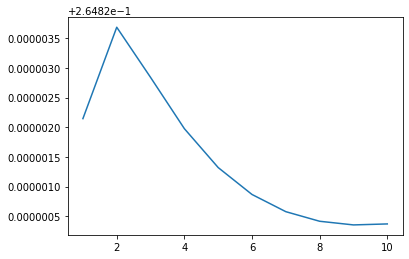

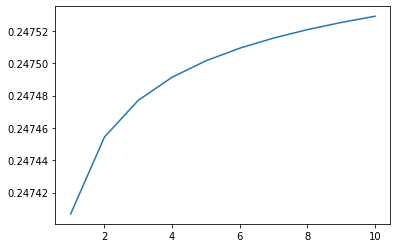

In [223]:
epochs = 10
lr3 = SGDRegressor(random_state=42)
result = np.array([[i+1,lr3.partial_fit(X_train_scaled, y_train).score(X_valid_scaled, y_valid),lr3.score(X_train_scaled,y_train),lr3.coef_] for i in range(epochs)])
plt.plot(result[:,0],result[:,1])
plt.show()
plt.plot(result[:,0],result[:,2])


In [10]:
lr = SGDRegressor(verbose=1, max_iter=10, random_state=42)
lr.fit(X_train_scaled, y_train)
lr.score(X_valid_scaled, y_valid)

In [222]:
epochs = 50
lr3 = SGDRegressor(random_state=42)
result = np.empty([0,5])
for i in range (10):
    result = np.vstack((result,[1,2,3,4,5]))
    
result

array([[1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.]])

Draw chart of model weights ($w_0$ and $w_1$) behavior during training.

In [11]:
#plt.subplot(121)
#plt.plot(range(len(sgd_reg.weights_)), 
#         [w[0] for w in sgd_reg.weights_]);
#plt.subplot(122)
#plt.plot(range(len(sgd_reg.weights_)), 
#         [w[1] for w in sgd_reg.weights_]);

Make a prediction for hold-out  set `(X_valid_scaled, y_valid)` and check MSE value.

¿Entiendes que es el sgd_holdout_mse? Prueba a buscarlo

In [12]:
# you code here
sgd_holdout_mse = 10

Do the same thing for `LinearRegression` class from `sklearn.linear_model`. Evaluate MSE for hold-out set.

In [13]:
# you code here
linreg_holdout_mse = 9

In [14]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.\n Linreg's holdout MSE: {}"
          "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse))

Something's not good.
 Linreg's holdout MSE: 9
 SGD's holdout MSE: 10
